In [1]:
import pandas as pd
import numpy as np


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
data=pd.read_csv('1_Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
# Business problem:-To find out whether customers will leave the bank or not.

In [9]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
## missing values check
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
# Converison of categorical data
Geography=pd.get_dummies(data.Geography,drop_first = True)
Gender=pd.get_dummies(data.Gender,drop_first=True)

In [15]:
Geography

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [17]:
Gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [19]:
data=pd.concat([data,Geography,Gender],axis=1)

In [21]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [23]:
data.drop(['Geography','Gender'],axis=1,inplace=True)

In [25]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [27]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [29]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [31]:
## Creating independent and dependent variable.
X=data.loc[:,['CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary','Germany', 'Spain', 'Male']]
y=data.Exited

In [33]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [35]:
## Training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=20)

In [36]:
X_train.shape

(7500, 11)

In [37]:
X_test.shape

(2500, 11)

In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
!pip install keras

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [45]:
# Defining the model
model=Sequential()

In [47]:
# Adding input layer to first hidden layer
model.add(Dense(units=11,input_dim=11,activation='relu',
                kernel_initializer='he_uniform'))

# Adding first hidden layer to second hidden layer
model.add(Dense(units=16,activation='relu',kernel_initializer='he_uniform'))

# Adding second hidden layer to third hidden layer
model.add(Dense(units=8,activation='relu',kernel_initializer='he_uniform'))

# Adding third hidden layer to output layer
model.add(Dense(units=1,activation='sigmoid',kernel_initializer = 'glorot_uniform'))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 469 (1.83 KB)

 Trainable params: 469 (1.83 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
...
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [50]:
X_train.shape

(7500, 11)

In [51]:
# fit the keras model on the dataset
model_history=model.fit(X_train, y_train, epochs=15,validation_split=0.33, batch_size=10)

Epoch 1/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7860 - loss: 0.5327 - val_accuracy: 0.8017 - val_loss: 0.4504
Epoch 2/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7921 - loss: 0.4701 - val_accuracy: 0.8179 - val_loss: 0.4184
Epoch 3/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8104 - loss: 0.4295 - val_accuracy: 0.8251 - val_loss: 0.4081
Epoch 4/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8147 - loss: 0.4304 - val_accuracy: 0.8304 - val_loss: 0.4013
Epoch 5/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8199 - loss: 0.4247 - val_accuracy: 0.8316 - val_loss: 0.3927
Epoch 6/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8185 - loss: 0.4170 - val_accuracy: 0.8421 - val_loss: 0.3843
Epoch 7/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8295 - loss: 0.3991 - val_accuracy: 0.8457 - val_loss: 0.3779
Epoch 8/15
503/503 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8302 - loss: 0.3907 - val_accuracy: 0.

In [52]:
model.evaluate(X_test,y_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8583 - loss: 0.3414


[0.35614797472953796, 0.8519999980926514]

In [61]:
...
# evaluate the keras model
accuracy = model.evaluate(X_test, y_test)
accuracy

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8583 - loss: 0.3414


[0.35614797472953796, 0.8519999980926514]

In [63]:
# list all data in history
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [65]:
model_history.history

{'accuracy': [0.7870222926139832,
  0.7987658977508545,
  0.8071258068084717,
  0.8166799545288086,
  0.821457028388977,
  0.825039803981781,
  0.8286226391792297,
  0.8332006335258484,
  0.8387739062309265,
  0.84375,
  0.8455414175987244,
  0.847332775592804,
  0.8511146306991577,
  0.849920392036438,
  0.8503184914588928],
 'loss': [0.5128585696220398,
  0.462249219417572,
  0.44076675176620483,
  0.4282786250114441,
  0.41855522990226746,
  0.4108683168888092,
  0.4028526246547699,
  0.3943878412246704,
  0.38581201434135437,
  0.3787296414375305,
  0.3695361614227295,
  0.36547091603279114,
  0.36137983202934265,
  0.357514888048172,
  0.3552693724632263],
 'val_accuracy': [0.8016963005065918,
  0.8178513646125793,
  0.8251211643218994,
  0.8303715586662292,
  0.8315832018852234,
  0.8420839905738831,
  0.8457189202308655,
  0.8489499092102051,
  0.8477382659912109,
  0.8558158278465271,
  0.848546028137207,
  0.8537964224815369,
  0.854604184627533,
  0.861873984336853,
  0.86106

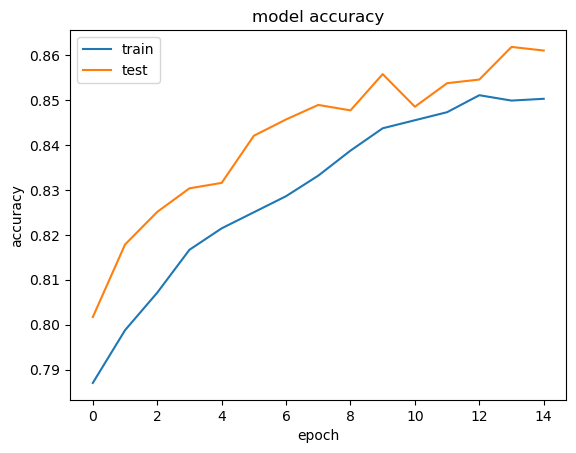

In [67]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

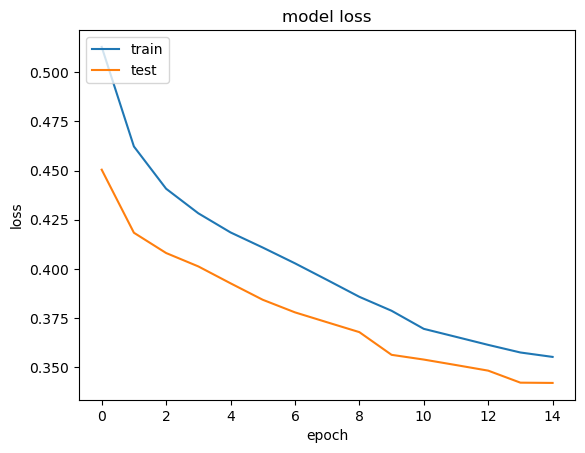

In [68]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
#Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [73]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1944,   78],
       [ 292,  186]], dtype=int64)

In [75]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.852

In [77]:
import pandas as pd

# Define the input values
new_customer = {
    "CreditScore": 650,
    "Age": 40,
    "Tenure": 5,
    "Balance": 75000.0,
    "NumOfProducts": 2,
    "HasCrCard": 1,
    "IsActiveMember": 1,
    "EstimatedSalary": 50000.0,
    "Germany": 0,
    "Spain": 0,
    "Male": 0
}

# If customer is from Germany and Male, set accordingly:
# Example: France, Female → Germany = 0, Spain = 0, Male = 0
# Example: Germany, Male → Germany = 1, Spain = 0, Male = 1
# Example: Spain, Female → Germany = 0, Spain = 1, Male = 0

# Convert input to DataFrame
input_df = pd.DataFrame([new_customer])

# Predict using the trained model
prediction = model.predict(input_df)[0]

# Output result
print("🔴 Customer will leave the bank." if prediction == 1 else "🟢 Customer will stay with the bank.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
🔴 Customer will leave the bank.


In [79]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
import os

# Run streamlit in background
os.system("streamlit run streamlit_app.py")
